# ITMAL Demo: Covariance Matrix

REVISIONS| |
---------| |
2018-0225| CEF, initial.
2018-0214| CEF, added refs.

NOTE: some code snippets from 

> https://datascienceplus.com/understanding-the-covariance-matrix/

The shapes...X.shape=(200, 2), (X.T)[0].shape=(200,)

Biased..
cov_mat(X.T)  =
[[ 11.13487089 -24.18355971]
 [-24.18355971  81.42106249]]

np.cov(X.T) =
[[ 11.13487089 -24.18355971]
 [-24.18355971  81.42106249]]

Unbiased..
cov_mat(X.T)  =
[[ 11.19082502 -24.30508513]
 [-24.30508513  81.83021355]]

np.cov(X.T) =
[[ 11.19082502 -24.30508513]
 [-24.30508513  81.83021355]]
X=[[  2.17 -11.06]
   [  0.93  -2.3 ]
   ...
   [  1.89   1.8 ]
   [ -0.4  -14.96]]


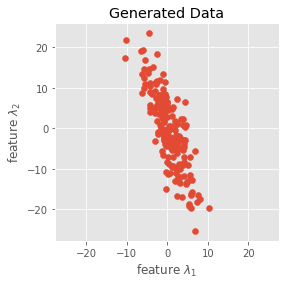

In [26]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from libitmal import utils as itmalutils

def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    import os
    path = os.path.join("/home/cef/", fig_id + "." + fig_extension) 
    print(f"Saving figure to file '{path}'")
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
def GenerateData():
    # Normal distributed x and y vector with mean 0 and standard deviation 1
    N=200
    x = np.random.normal(0, 2, N)
    y = np.random.normal(0, 1, N)
    X = np.vstack((x, y)).T
    return X

def ScaleAndRotate(X, r=0.77, sx=0.7, sy=3.4):
    # Scaling matrix
    Scale = np.array([[sx, 0], [0, sy]])

    # Rotation matrix
    theta = r*np.pi
    c, s = np.cos(theta), np.sin(theta)
    Rot = np.array([[c, -s], [s, c]])

    # Transformation matrix
    T = Scale.dot(Rot)

    # Apply transformation matrix to X
    Y = X.dot(T)
    return Y

def DoPlot(X):
    plt.style.use('ggplot')
    plt.rcParams['figure.figsize'] = (4, 4)
    plt.scatter(X[:, 0], X[:, 1])
    plt.title('Generated Data')
    plt.axis('equal');
    plt.xlabel('feature $\lambda_1$')
    plt.ylabel('feature $\lambda_2$')
    #save_fig('covariance') 

# Covariance
def cov(x, y, bias=True):
    assert len(x)==len(y) 
    xbar, ybar = x.mean(), y.mean()
    if bias:
        n=len(x)
    else: 
        n=len(x) - 1
    assert n>0
    return np.sum((x - xbar)*(y - ybar))/n

# Covariance matrix
def cov_mat(X, bias=True):
    return np.array([\
        [cov(X[0], X[0], bias), cov(X[0], X[1], bias)], \
        [cov(X[1], X[0], bias), cov(X[1], X[1], bias)]  \
    ])

X = GenerateData()
X = ScaleAndRotate(X, 0.9, 1, 10)
DoPlot(X)

print(f'The shapes...X.shape={X.shape}, (X.T)[0].shape={(X.T)[0].shape}')

# Calculate covariance matrix
C0_biased=cov_mat  (X.T, bias=True)
C1_biased=np.cov   (X.T, bias=True, rowvar=True)
C0_unbiased=cov_mat(X.T, bias=False)
C1_unbiased=np.cov (X.T, bias=False,rowvar=True)

print('\nBiased..')
print(f'cov_mat(X.T)  =\n{C0_biased}')
print(f'\nnp.cov(X.T) =\n{C1_biased}')

print('\nUnbiased..')
print(f'cov_mat(X.T)  =\n{C0_unbiased}')
print(f'\nnp.cov(X.T) =\n{C1_unbiased}')

itmalutils.AssertInRange(C0_biased,  C1_biased)
itmalutils.AssertInRange(C0_unbiased,C1_unbiased)

#def PrintMatrix(X, label="", precision=2, threshold=100, edgeitems=1, linewidth=80, suppress=True):
itmalutils.PrintMatrix(X, label="X=", edgeitems=2)
